In [1]:
"""
Cricket Fielding Performance Analysis
Advanced Level – Sports Analytics Task

Author: Student Submission
Description:
- Collects ball-by-ball fielding data
- Computes individual fielding metrics
- Applies weighted Performance Score formula
- Exports results to Excel
"""
import pandas as pd
fielding_data = [
    [1, 1, "India", "Ravindra Jadeja", 1, "Point",
     "Sharp stop and direct hit", "Clean Pick", "Run Out", 2, 5, "Wankhede"],

    [1, 1, "India", "Ravindra Jadeja", 3, "Point",
     "Quick pickup and return throw", "Clean Pick", "", 1, 7, "Wankhede"],

    [1, 1, "India", "Virat Kohli", 2, "Cover",
     "Dropped catch opportunity", "Drop Catch", "", -4, 10, "Wankhede"],

    [1, 1, "India", "Virat Kohli", 5, "Cover",
     "Safe catch completed", "Catch", "", 0, 14, "Wankhede"],

    [1, 1, "India", "MS Dhoni", 4, "Wicket Keeper",
     "Quick stumping effected", "Clean Pick", "Stumping", 3, 16, "Wankhede"],

    [1, 1, "India", "MS Dhoni", 6, "Wicket Keeper",
     "Missed run out attempt", "Good Throw", "Missed Run Out", -1, 18, "Wankhede"]
]

columns = [
    "Match No", "Innings", "Team", "Player Name", "Ballcount",
    "Position", "Short Description", "Pick", "Throw",
    "Runs", "Overcount", "Venue"
]

df = pd.DataFrame(fielding_data, columns=columns)
WEIGHTS = {
    "CP": 1,
    "GT": 2,
    "C": 8,
    "DC": -5,
    "ST": 8,
    "RO": 10,
    "MRO": -6,
    "DH": 6
}
def calculate_player_metrics(player_df):
    metrics = {
        "CP": (player_df["Pick"] == "Clean Pick").sum(),
        "GT": (player_df["Pick"] == "Good Throw").sum(),
        "C": (player_df["Pick"] == "Catch").sum(),
        "DC": (player_df["Pick"] == "Drop Catch").sum(),
        "ST": (player_df["Throw"] == "Stumping").sum(),
        "RO": (player_df["Throw"] == "Run Out").sum(),
        "MRO": (player_df["Throw"] == "Missed Run Out").sum(),
        "DH": player_df["Short Description"].str.contains(
            "direct hit", case=False, na=False).sum(),
        "RS": player_df["Runs"].sum()
    }
    return metrics
def calculate_performance_score(metrics):
    score = (
        metrics["CP"] * WEIGHTS["CP"] +
        metrics["GT"] * WEIGHTS["GT"] +
        metrics["C"]  * WEIGHTS["C"]  +
        metrics["DC"] * WEIGHTS["DC"] +
        metrics["ST"] * WEIGHTS["ST"] +
        metrics["RO"] * WEIGHTS["RO"] +
        metrics["MRO"]* WEIGHTS["MRO"]+
        metrics["DH"] * WEIGHTS["DH"] +
        metrics["RS"]
    )
    return score
performance_records = []

for player in df["Player Name"].unique():
    player_df = df[df["Player Name"] == player]
    metrics = calculate_player_metrics(player_df)
    ps = calculate_performance_score(metrics)

    record = {
        "Player Name": player,
        **metrics,
        "Performance Score": ps
    }

    performance_records.append(record)

performance_df = pd.DataFrame(performance_records)
output_file = "Cricket_Fielding_Analysis.xlsx"

with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Fielding_Data", index=False)
    performance_df.to_excel(writer, sheet_name="Performance_Score", index=False)

print("Cricket Fielding Analysis file created successfully!")
print(f"File Name: {output_file}")


Cricket Fielding Analysis file created successfully!
File Name: Cricket_Fielding_Analysis.xlsx


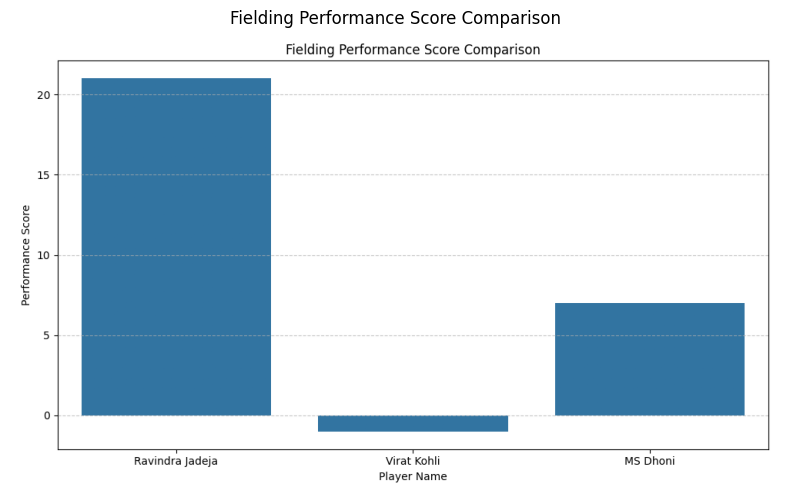

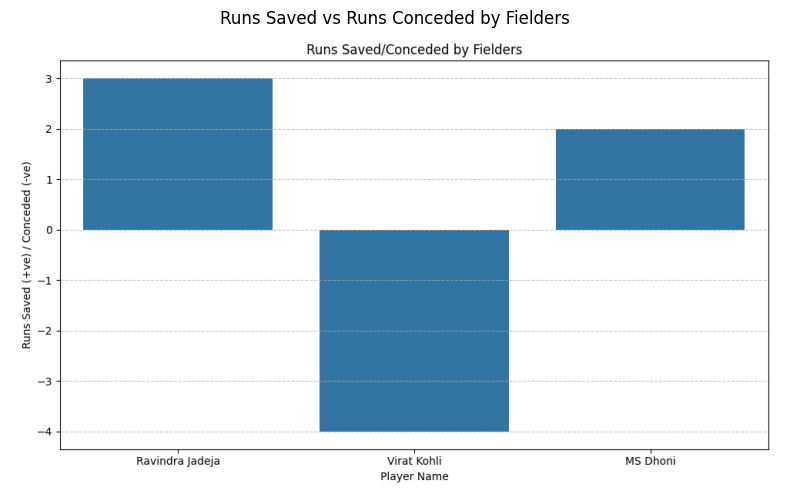

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Name", y="Performance Score", data=performance_df)
plt.title("Fielding Performance Score Comparison")
plt.ylabel("Performance Score")
plt.xlabel("Player Name")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("performance_score.png")
plt.close()
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Name", y="RS", data=performance_df)
plt.title("Runs Saved/Conceded by Fielders")
plt.ylabel("Runs Saved (+ve) / Conceded (-ve)")
plt.xlabel("Player Name")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("runs_impact.png")
plt.close()
performance_img = mpimg.imread("performance_score.png")
runs_img = mpimg.imread("runs_impact.png")
plt.figure(figsize=(10, 6))
plt.imshow(performance_img)
plt.axis("off")
plt.title("Fielding Performance Score Comparison")
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(runs_img)
plt.axis("off")
plt.title("Runs Saved vs Runs Conceded by Fielders")
plt.show()